In [6]:
import random

def simulate_return(win_prob, win_return, loss_return, initial_capital, num_trials):
    results = []
    for i in range(num_trials):
        capital = initial_capital
        for j in range(150):
            if random.random() < win_prob:
                capital += capital * win_return
            else:
                capital -= capital * loss_return
        results.append(capital)
    return results 

win_prob = 0.6
win_return = 0.15
loss_return = 0.1
initial_capital = 10000
num_trials = 100000

results = simulate_return(win_prob, win_return, loss_return, initial_capital, num_trials)
average_return = sum(results) / num_trials ,min(results), max(results)
print(average_return, average_return[0]/initial_capital)


(15165445.071205849, 6967.263945267318, 3905261616.129075) 1516.544507120585


In [10]:
import numpy as np

win_prob = 0.5
profit_ratio = win_return
loss_ratio = -loss_return

expected_return = win_prob * profit_ratio + (1-win_prob) * loss_ratio

print("Expected return: {:.2f}".format(expected_return))
expected_return ** 100 * 10000

Expected return: 0.05


7.888609052210162e-127

In [13]:
# sharpe_ratio = 
max_down = 10000*0.9**3

max_down

7290.000000000001

In [56]:
win_prob = 0.5
win_return = 0.2
loss_return = 0.1
initial_capital = 10000

capital = initial_capital
capitals = []
for j in range(100):
    if random.random() < win_prob:
        capital += capital * win_return
    else:
        capital -= capital * loss_return
    capitals.append(capital)

print(capital)

62606.0953164286


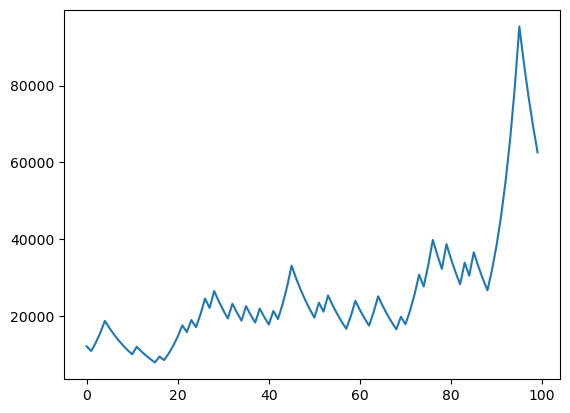

In [57]:
import matplotlib.pyplot as plt

plt.plot(capitals)
plt.show()

MA0
均值+方差: 0.052 


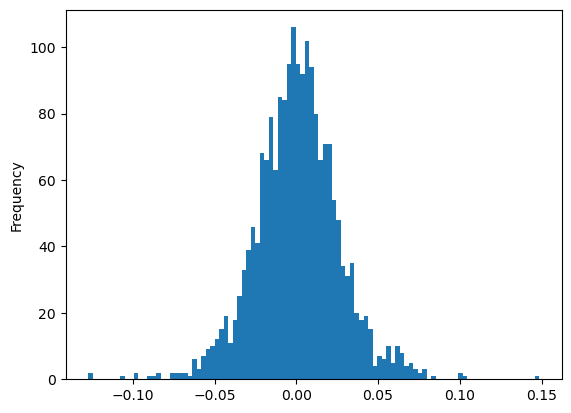

v0
均值+方差: 0.037 


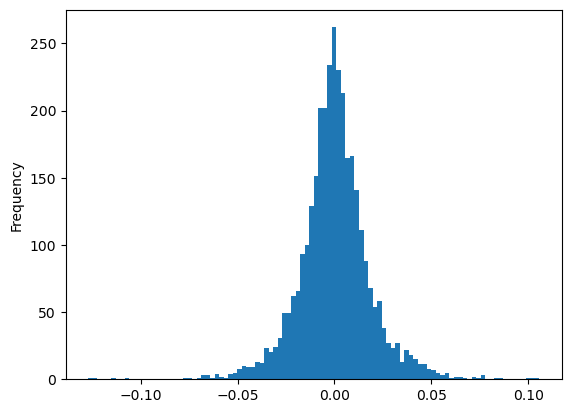

RB0
均值+方差: 0.044 


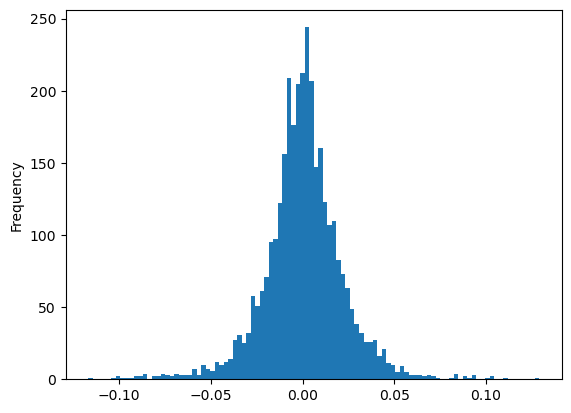

c0
均值+方差: 0.031 


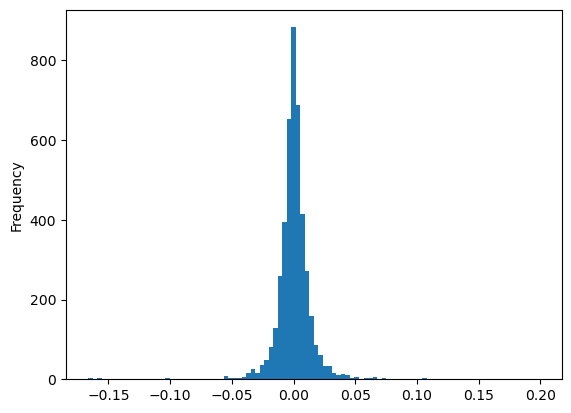

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak

def plot_daily_change(df, days = 2):
    # 计算2日价格变化率
    df['pct_change'] = (df['close'] - df['close'].shift(days)) / df['close'].shift(days)

    # 计算分位数和均值
    pct_change_quantiles = np.percentile(df['pct_change'].dropna(), [25, 50, 75])
    pct_change_mean = df['pct_change'].mean()

    print("均值+方差: {:.3f} ".format(df['pct_change'].mean() + 2 * df['pct_change'].std()))
    
    # 绘制直方图
    df['pct_change'].plot.hist(bins=100)
    plt.show()


symbols = ["MA0", "v0", "RB0", "c0"]
# symbols = ["MA2305", "v2305", "RB2305", "c2305"]

for symbol in symbols:
    print(symbol)

    df = ak.futures_zh_daily_sina(symbol=symbol).iloc[:, :6]
    # df = ak.futures_zh_minute_sina(symbol=symbol, period="30").iloc[:, :6]

    plot_daily_change(df, 2)
